In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
df = pd.read_csv("../input/daily-gold-price-historical-data/gold.csv")

In [3]:
df.info

<bound method DataFrame.info of             Date    Open     High      Low   Close  Volume Currency
0     2000-01-04   289.5   289.50   280.00   283.7   21621      USD
1     2000-01-05   283.7   285.00   281.00   282.1   25448      USD
2     2000-01-06   281.6   282.80   280.20   282.4   19055      USD
3     2000-01-07   282.5   284.50   282.00   282.9   11266      USD
4     2000-01-10   282.4   283.90   281.80   282.7   30603      USD
...          ...     ...      ...      ...     ...     ...      ...
5698  2022-08-29  1748.4  1757.90  1731.40  1749.7  156220      USD
5699  2022-08-30  1749.8  1752.80  1732.90  1736.3  130664      USD
5700  2022-08-31  1735.5  1738.00  1720.60  1726.2  176731      USD
5701  2022-09-01  1723.0  1723.00  1699.10  1709.3  198618      USD
5702  2022-09-02  1707.9  1729.45  1707.05  1723.0       0      USD

[5703 rows x 7 columns]>

In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000
mean,1040.382816,1048.339181,1031.863169,1040.298282,139141.669297
std,518.733377,522.353946,514.455903,518.524020,102537.449058
min,256.600000,259.400000,255.100000,256.600000,0.000000
25%,459.850000,463.900000,457.450000,460.500000,52938.500000
50%,1188.800000,1198.000000,1179.700000,1188.700000,126006.000000
75%,1381.400000,1392.750000,1368.100000,1383.050000,193109.000000
max,2076.400000,2089.200000,2049.000000,2069.400000,816531.000000


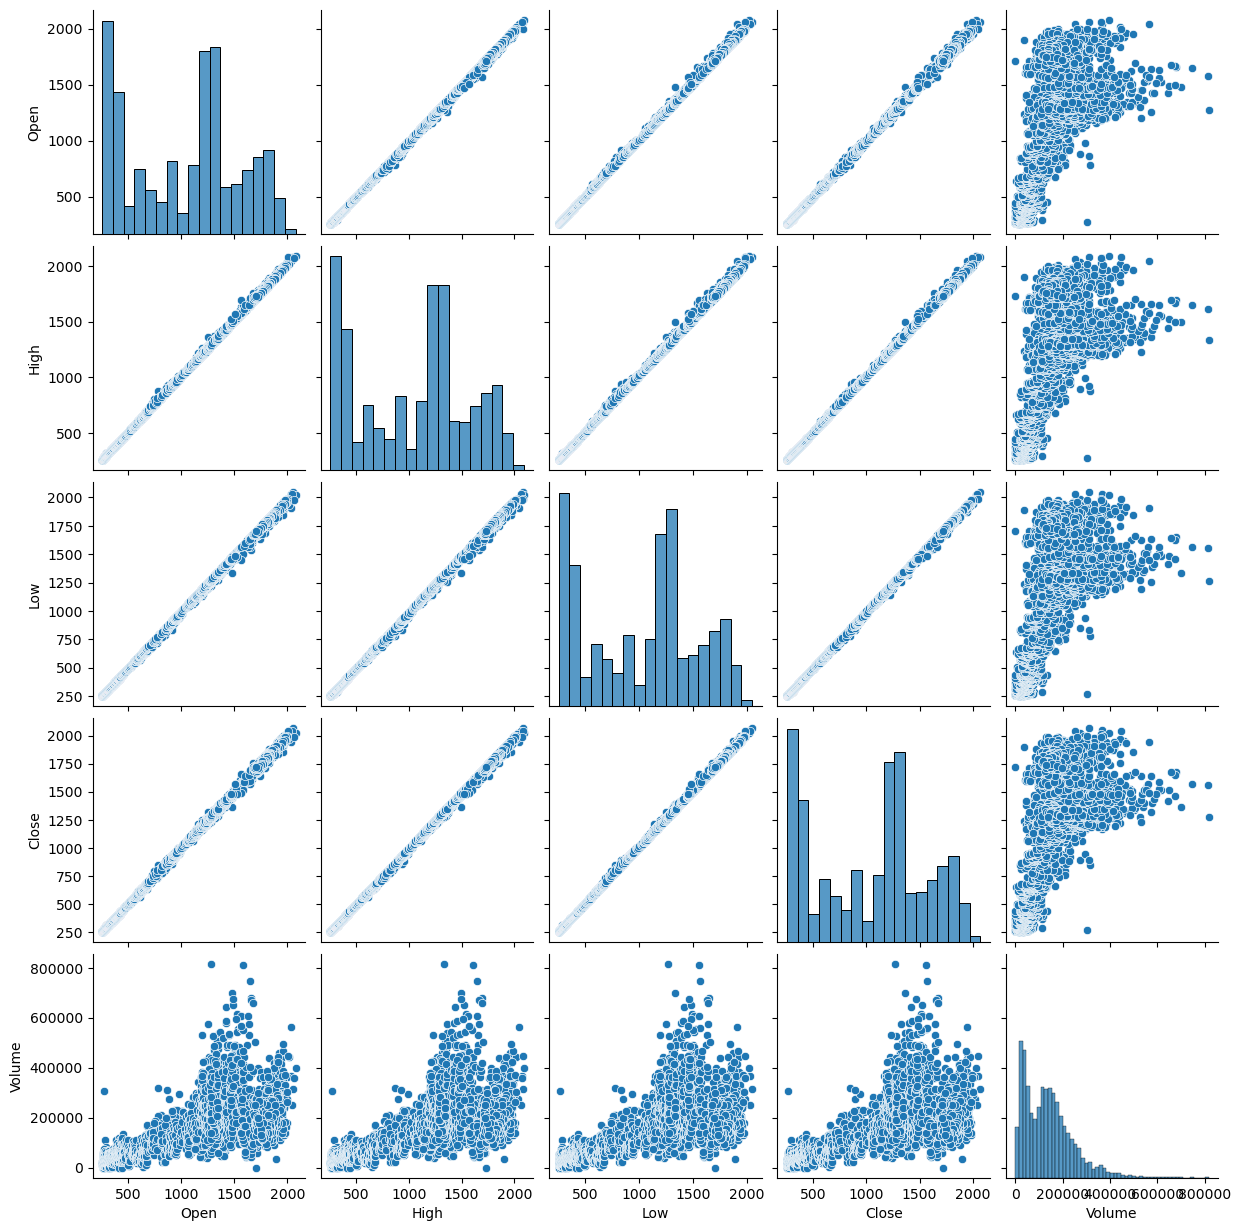

In [5]:
sns.pairplot(df)

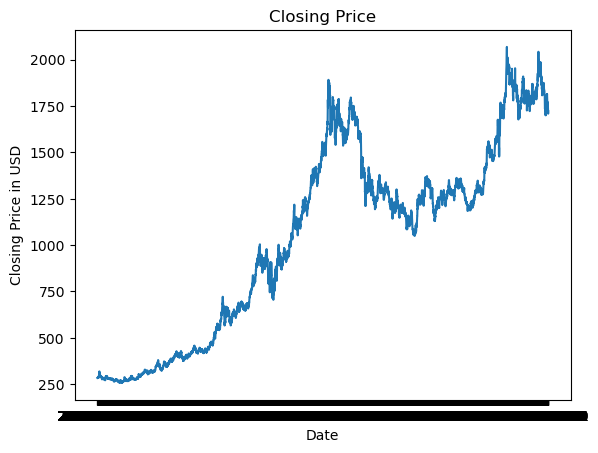

In [6]:
plt.plot(df['Date'],df['Close'])
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.show()

In [7]:
data = np.array(df["Close"])
# data = np.array(data).reshape(1,-1)

In [8]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.reshape(-1,1))
scaled_data

array([[0.01494925],
       [0.01406664],
       [0.01423213],
       ...,
       [0.81067961],
       [0.80135702],
       [0.80891439]])

In [9]:
train_data, test_data = scaled_data[:int(0.9*(len(data)))], scaled_data[int(0.9*(len(data))):]

In [10]:
train_data

array([[0.01494925],
       [0.01406664],
       [0.01423213],
       ...,
       [0.8021293 ],
       [0.81183804],
       [0.82474625]])

In [11]:
train_x = []
train_y = []
batch_size = 50
for i in range(batch_size,len(train_data)):
    train_x.append(train_data[i-batch_size:i,0])
    train_y.append(train_data[i,0])

In [12]:
train_x = np.array(train_x)
train_y = np.array(train_y)

In [13]:
train_x.shape

(5082, 50)

In [14]:
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

def build_model():
    model = Sequential()
    
    model.add(LSTM(128, return_sequences = True, input_shape = (train_x.shape[1], 1)))
    model.add(LSTM(64, return_sequences = False))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1))
    
    return model

In [16]:
model = build_model()

In [17]:
model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 118,081
Trainable params: 118,081
Non-trainable params: 0
_________________________________________________________________


In [18]:
hist = model.fit(train_x, train_y, batch_size=1, epochs=1)

5082/5082 [==============================] - 139s 27ms/step - loss: 6.5536e-04


In [19]:
test = []
for i in range(batch_size, len(test_data)):
    test.append(test_data[i-batch_size:i, 0])

In [20]:
test = np.array(test)

In [21]:
test = np.reshape(test, (test.shape[0], test.shape[1], 1))

In [22]:
predictions = model.predict(test)
predictions = scaler.inverse_transform(predictions)
predictions[0:10]

17/17 [==============================] - 1s 27ms/step


array([[1932.483 ],
       [1897.8528],
       [1870.3513],
       [1863.5558],
       [1859.7817],
       [1877.3894],
       [1899.8208],
       [1900.4097],
       [1886.3112],
       [1872.8239]], dtype=float32)

In [23]:
test_data = scaler.inverse_transform(test_data)
test_data[:10]

array([[1750.3],
       [1734. ],
       [1704.8],
       [1727.4],
       [1683. ],
       [1705.1],
       [1721.9],
       [1720.7],
       [1739.8],
       [1737.3]])

In [24]:
rmse = np.sqrt(np.mean(((predictions - test_data[batch_size:]) ** 2)))
print("RMSE score of the model:", rmse)

RMSE score of the model: 81.6334449862443


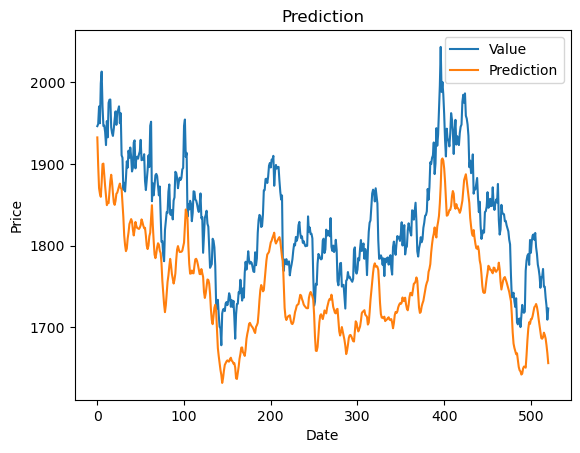

In [25]:
plt.title('Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(test_data[batch_size:])
plt.plot(predictions)
plt.legend(['Value', 'Prediction'], loc = 'best')
plt.show()